<a href="https://colab.research.google.com/github/doraxu938/Infer/blob/master/Final_project_info_1998.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Hurricane Katrina's Impact on Louisiana's Labor Market**

By Anoushka Kabra (ark258), Dora Xu (dx33), and Riki Funaki (rf388)
##Introduction

Our group was interested in exploring a topic that had to do with both social issues and advocacy as well as had applications to economic activity or finance. We decided on a dataset about the various factors of the labor market before and after Hurricane Katrina hit Louisiana in the third quarter of 2005. We thought this dataset was important because it could allow us to analyze the severity of the natural disaster on the labor market and better understand the relationship between the factors. It could also potentially give information about how quickly the health of the state's economy returned to normal, which would be significant overall in understanding the effect that natural disasters have in politics, social welfare, and the economy.

The question we chose to answer is: How was Lousiana's employment level and quarterly wages affected by Hurricane Katrina? 

The dataset that we selected came from Kaggle:
The Devastator. “How Natural Disasters Impact Region’s Labor Market.” Kaggle.com, 2022, www.kaggle.com/datasets/thedevastator/how-natural-disasters-impact-regions-labor-market?resource=download. Accessed 30 Nov. 2022.

##Hypothesis
Our hypothesis is that the natural disaster severely decreased the employment level and total quarterly wages in 2005 and didn't rebound back to original rates until a year later in 2007.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
original_data = pd.read_csv('louisana_clean_emp_with_shock_info.csv')
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Anoushka 
#Visualization 1


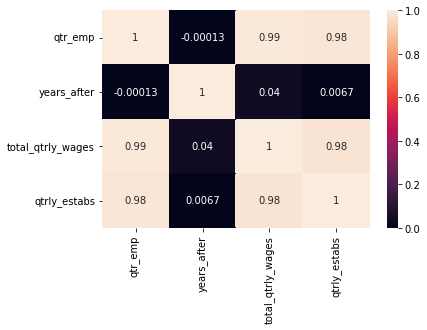

,Unnamed: 0,area_fips,year,qtr,qtrly_estabs,month1_emplvl,month2_emplvl,month3_emplvl,total_qtrly_wages,qtr_emp,affected_county,after_2005Q3,affected_county_after_shock,years_after
0,383,22063,2003,4,1400,17866,17697,17696,110988687,53259,1,0,0,0
1,346,22045,2003,3,1803,30620,30973,31483,223175185,93076,1,0,0,0
2,345,22045,2003,2,1810,29598,29863,30518,219521478,89979,1,0,0,0
3,344,22045,2003,1,1805,29188,29038,28976,210096622,87202,1,0,0,0
4,343,22043,2003,4,221,3145,3165,3214,21520968,9524,0,0,0,0


In [ ]:
#Anoushka's Visualization
#Correlation matrix  with employment level and quarterly wages and the year itself 
# Some sort of map showing affected counties before and after shock?

X = pd.DataFrame(original_data, columns = ['qtr_emp', 'years_after', 'total_qtrly_wages', 'qtrly_estabs'])
corr = X.corr() # Get the correlation matrix
sns.heatmap(corr, annot=True) # Although it is called heatmap here, it nonetheless shows the pairwise correlation between features.
plt.show()

df = pd.read_csv('louisana_clean_emp_with_shock_info.csv')
# X=df.data(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
# Y=df['diagnosis']

df.head()

# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1998)

#  Predict quarterly employment and employment in general after certain 
# number of years/ Predict when labor market conditions will return to beginning 
# conditions/ how many years will it take(using months/years) 





#Visualization 1: Correlation matrix analysis

In order to analyze how close the relationship is between each factor in the dataset, we created a correlation matrix with a heat map to show the correlation coefficient for each combination of pairs and indicate the pairs that had a higher correlation. Using a scale from 0 to 1, pairs with low correlation were filled in black while pairs with higher correlation were filled with the color beige. From the visualization, you can see that years_after had low correlation with qtr_emp, total_qtrly_wages, and qtrly_estabs since they are filled in black and have the coefficients of -0.00013, 0.04, and 0.0067. This intuitively makes sense since the numerical date has less of a relation to the quantitative numbers of employment. On the other hand, the other three factors all were beige because they had relatively strong correlation coefficients to each other with 0.98,0,99, and 1. The correlation matrix supports the question because it confirms that quarterly employment is strongly related to quarterly wages, which will allow us to utilize both of these factors to make predictions about the other in a model. 

Dora 
#Visualization 2

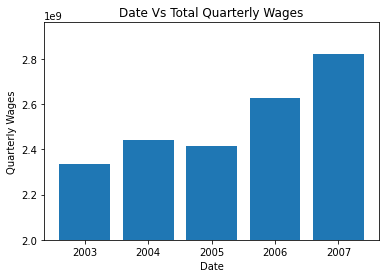

In [ ]:
#bar graph of quarterly wages by year
date = df['year']
wages = df['total_qtrly_wages']

plt.bar(date, wages)
plt.title('Date Vs Total Quarterly Wages')
plt.xlabel('Date')
plt.ylabel('Quarterly Wages')
plt.ylim(bottom = 2000000000) #adjusting the y-axis units
plt.show()

#Visualization 2: Bar graph analysis

In order to visualize the change in the total quarterly wages from before the hurricane(2005) to after the disaster, we made a bar graph with the year on the x-axis and total quarterly wages in units of 10^9 on the y-axis. The graph indicates that from 2003-2004, total quarterly wages increased from 2.35 to 2.45 probably from normal economic activity during that year. From 2004 to 2005, the number drops to 2.4 due to the hurricane. One surprising observation is that the numbers increase up to 2.6 by 2006, which goes against our hypthesis because we thought it would take longer for the economic health of Lousiana's counties to heal from the disaster. The total quarterly wages increases even more to 2.8 by 2007. The results from the graph indicate that Louisiana rebounded much faster than expected in terms of its total quarterly wages. This could have happened in conjunction to other economic activity or global geopolitical conditions. For example, research that we conducted revealed that four days after Katrina's landfall in Lousiana, President George W. Bush signed a 10.4 billion dollar aid package and ordered 7,200 National Guard troops to the region. A few days later, Congress also approved an additional 58.1 billion dollars in aid as well. While overall the hurricane had many devastating effects on Louisiana's residents, the reason why the bar graph shows these particular results could be due to the fast response of the government in providing relief aid for the event. 

Source: https://www.politico.com/story/2012/10/10-facts-about-the-katrina-response-081957 

Riki 
#Model 1

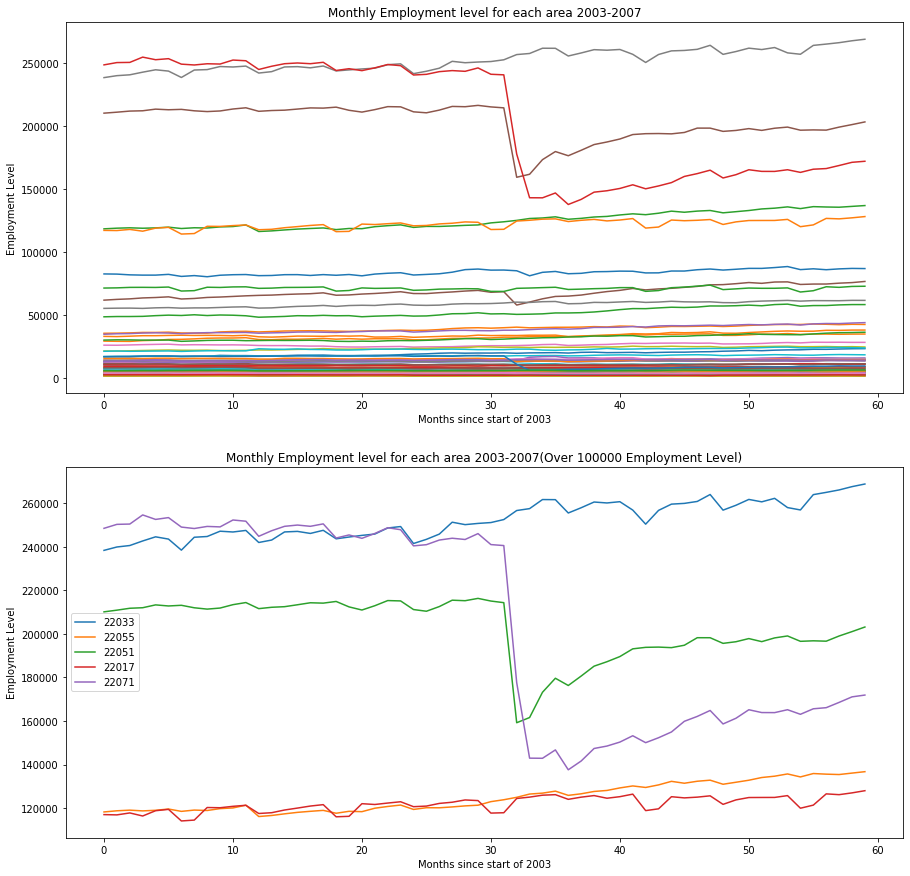

In [ ]:
#Get change in monthly employment level over time to see trends
# ax1 shows monthly employment level over time for all areas
# ax2 only shows a section of ax1 where the employment level is over 100000
fig,(ax1,ax2) = plt.subplots(2,figsize = (15,15))

for fip in df.area_fips.unique():
    fip_change = df[(df['area_fips'] == fip)].sort_values(by=['year','qtr']).reset_index()
    emp = [] #Gets all employment levels for 'fip' for each month for 2003-2007 in order
    for _,row in fip_change.iterrows():
        emp.extend([row['month1_emplvl'],row['month2_emplvl'],row['month3_emplvl']])
    ax1.plot(emp)
    if max(emp)>100000:ax2.plot(emp,label = str(fip))

ax1.set_title('Monthly Employment level for each area 2003-2007')
ax1.set_xlabel('Months since start of 2003')
ax1.set_ylabel('Employment Level')

ax2.set_title('Monthly Employment level for each area 2003-2007(Over 100000 Employment Level)')
ax2.set_xlabel('Months since start of 2003')
ax2.set_ylabel('Employment Level')
ax2.legend()
plt.show()  

From the graphs, we can see that most of the area_fips show a linear trend. However, as seen in the second graph, there are some outliers like 22071 and 22051 that show a steep dip around month 32-33(Around 2005 Q3)

In [ ]:
#Was this dip brought on by the disaster?
outliers = [22071,22051] #Areas with a dip in employment
linear = [22033,22055,22017] #Areas with linear improvement in employment
for area in outliers:
  print('Was '+str(area)+'(Outlier) affected by the disaster?:',all(df[df['area_fips'] == area]['affected_county']))
print()
for area in linear:
  print('Was '+str(area)+'(Linear) affected by the disaster?:',all(df[df['area_fips'] == area]['affected_county']))

Was 22071(Outlier) affected by the disaster?: True
Was 22051(Outlier) affected by the disaster?: True

Was 22033(Linear) affected by the disaster?: True
Was 22055(Linear) affected by the disaster?: False
Was 22017(Linear) affected by the disaster?: False


Looking at the 'affected_county' column of each area in the second graph, we can see that the outliers which had the steep dip were all affected by the disaster. Because the disaster happened the same time the dip happened (August 2005), we can also assume that the dip happened because of the disaster. <br>However, 22033 was also affected by the disaster but didn't have the dip in employment like 22071 and 22051, and kept a steady linear-like employment increase, so the disaster alone is not the deciding factor in an area's employment level.

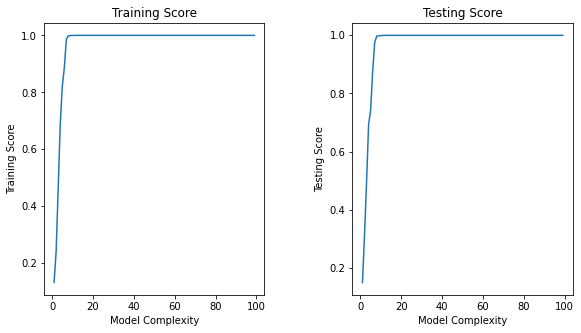

Best Max Depth = 14
Chosen Max Depth = 8
Score: 0.9966702377003733


,REAL qtr_emp,PREDICTED qtr_emp
0,179906,175538.187500
1,22068,24989.931818
2,7933,13547.531915
3,4459,27954.400000
4,15889,10980.606061
5,110509,112081.000000
6,20484,23990.000000
7,4501,27954.400000
8,16826,16563.500000
9,54107,52396.571429


In [ ]:
X = df[['area_fips','affected_county','year','qtr']]
Y = df['qtr_emp']

x_tr, x_te, y_tr, y_te = train_test_split(X,Y,test_size=0.2)

train_scores = []
test_scores = []


max_depths = list(range(1,100))
best_depth = 1
best_score = 0
reach_99 = False
reach_99_depth = 0 #First depth to reach a score >=0.99
for i in max_depths:
    model = tree.DecisionTreeRegressor(max_depth=i)
    model.fit(x_tr, y_tr)
    train_scores.append(model.score(x_tr, y_tr))
    score = model.score(x_te, y_te)
    if not reach_99 and score>=.99:
      reach_99_depth = i
      reach_99 = True
    if score>best_score:
        best_score = score
        best_depth = i
    test_scores.append(model.score(x_te, y_te))

plt.subplots(figsize=(15,5))
plt.subplots_adjust(wspace=0.4)
plt.subplot(131)
plt.plot(max_depths, train_scores)
plt.title('Training Score')
plt.xlabel('Model Complexity')
plt.ylabel('Training Score')
plt.subplot(132)
plt.plot(max_depths, test_scores)
plt.title("Testing Score")
plt.xlabel('Model Complexity')
plt.ylabel('Testing Score')
plt.show()

print('Best Max Depth =', best_depth)
print('Chosen Max Depth =',reach_99_depth)
best_model = tree.DecisionTreeRegressor(max_depth=reach_99_depth)
best_model.fit(x_tr,y_tr)
predictions = best_model.predict(x_te)
print('Score:', best_model.score(x_te,y_te))
pd.DataFrame({"REAL qtr_emp":y_te, "PREDICTED qtr_emp":predictions}).reset_index(drop=True).head(10)

#Model 1: Decision Tree Analysis
In order to predict the quarterly employment levels, we used area_fips(number that identify a certain geographic locations), affected_county(indicates if a certain county was affected by the disaster), year(the year in which the data was taken), and qtr(which quarter of the year the data was taken) as the inputs to our model. <br>
Looking at the monthly employment level change for 2003-2007, we can see that although there are many areas that seem to have a linear trend in employment level. However for some areas affected by the disaster have a steep dip in employment level, thus breaking the linear trend. Therefore, instead of using a purely linear regression model, we decided to use a Decision Tree Regression, as depending on if an area was affected/not affected by the disaster, their employment trends can change.  <br>
In implementing our Decision Tree Model, we discovered that both the training score and testing score eventually hit a 0.99+ after a certain depth of training, and then stayed around 0.99 with only minor improvements. This potentially lead to a risk of overfitting, as the model fits exactly against the training model. Therefore, to prevent this while maintaining a high score, we decided to get the first depth to reach 0.99 and use that as our depth. Going through more depths after that might get us a better score, but that score might not be reflective of the model's actual performance because of overfitting.


#Model 2

In [ ]:

#Predict quarterly wages after a certain time by creating a logistic regression model based on other wage factors such as employment level. 
#we separate X (features) and income Y (target)
incX = df[[ 'month2_emplvl', 'qtrly_estabs']]
incY = df['total_qtrly_wages']
from sklearn.linear_model import LinearRegression

# train test split your data with 20% being used for testing
incX_train, incX_test, incY_train, incY_test = train_test_split(incX, incY, test_size = 0.25)

# This is the logistic regression function
model = LinearRegression()

# fit the model using the train data
model.fit(incX_train, incY_train)

# store the predictions for the training and test set
pred_test = model.predict(incX_test)
score =  model.score(incX_test, incY_test)
print("Model score:", model.score(incX_test, incY_test))

#compare actual total quarterly wages to predicted quarterly wages
pd.DataFrame({"REAL quarterly wages":incY_test, "PREDICTED quarterly wages":pred_test}).reset_index(drop=True).head(10)


Model score: 0.9740789754664759


,REAL quarterly wages,PREDICTED quarterly wages
0,65620709,8.281307e+07
1,503097826,4.736765e+08
2,33847323,3.223537e+07
3,32256878,2.824438e+07
4,13878417,4.527878e+06
5,1604176932,1.940017e+09
6,54258508,8.377291e+07
7,168679041,1.030811e+08
8,166880726,1.191516e+08
9,24929191,7.344550e+06


#Model 2: Linear Regression
This model chosen is a linear regression model which have become a proven way to scientifically and reliably predict the future of different circumstances. This model was chosen our data is predicting the continuous output/dependent variable and our trend as seen from the bar chart is linear in nature with an anomaly of the 2005 event which occured and reduced employment slightly but not significantly for the logistical regression model to be chosen.

Now looking at the score produced of around 0.97 by the linear regression model chosen above, we can see that the model fits well. We basically tried to predict total quarterly wages taking into consideration the Month 2 employment levels and employment establishments [companies] present. We chose Month 2 specifically as that would represent the average of the quarter. As we can see the predicted quarterly wages are quite similar to the real quarterly wages based on the information provided.

Furthermore, this model would enable future researchers to predict the level of quarterly wages based on number of employment established and different employment levels.

#Conclusion

Based on the results of the visualizations and models that we created, we readdress our question and conclude that our original hypthesis is not supported. <br>
We orginally thought that the disaster would have a quite significant decrease on the total quarterly wages and employment levels after the disaster, but visualization 2 clearly shows the small decrease in total quarterly wages from 2004 to 2005 and the almost immediate increase after 2005. When exploring the relationship between the factors, visualization 1 illustrated that total_qtrly_wages, qtrly_emp, and qtry_estabs tended to have a much stronger correlation coefficient with each other, ranging between 0.98-1, than with years_after. This lead us to create two machine learning models: a decision tree regression to predict quarterly employment and a linear regression model to predict total quarterly employment. By conducting these models, we were able to confirm with high accuracy the values. <br>
For the decision tree regression, we correctly predicted quarterly employment with a score of 0.99+. We used a decision tree regression because, although most areas had a linear increase in quarterly employment overtime, several areas had a sudden dip in quarterly employment at one point in time, making a simple linear regression not suitable. By using a decision tree model, we weren't restricted to a linear our models and instead were able to factor in the dip that some of the areas had. In training the model, we figured out a max_depth that both had good performance but also prevented overfitting. We accomplished this looking at the test score trend and noticing that after reaching a score of 0.99+, the improvements to the model are marginal. Therefore, we used the first max depth to reach a score of 0.99+ to mitigate the chance of overfitting. <br>
For the linear regression model, we were able to predict the total quarterly wages at an accuracy of 97%. Originally, we explored using logistic regression since we believed that the significant decline in wages caused by the hurricane would affect the trend of the values. However, we discovered that the model yielded an accuracy of near 0 and that a linear regression model would be a better fit since visualization 2 showed such a small dip in wages from 2004-2005. Thus, since the decision tree regression and the linear regression model predicted quarterly employment and total quarterly wages with high accuracy, we reject our original hypothesis and conclude that the hurricane did have a devastating effect on the labor market in Louisiana but due to other factors such as a quick response from the government to provide relief aid, the economic activity was able to rebound faster than normal.